In [5]:
# Constants

RAW_DATA_FILES_PATH = 'G:\\My Drive\\AirPollutionML\\Raw_Data_Files'

# TODO:
# convert data from hourly to daily
# does hourly and daily data has some difference in pattern?
# convert every file to daily from hourly or build new files from base station daily files?
# does imputation help in data normalization?

# NOTE:
# use imputation to impute as less null values as possible
# use aggregated data files for insights on comapring year or region pollution

In [11]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.axes as pltaxes
import matplotlib.pyplot as plt
import regex

In [38]:
dfs = {}

In [39]:
for filename in os.listdir(RAW_DATA_FILES_PATH):
    if re.match(regex.YEAR_FILE_PATTERN, filename):
        file = os.path.splitext(filename)[0]
        dfs[file] = pd.read_csv(os.path.join(RAW_DATA_FILES_PATH, filename))

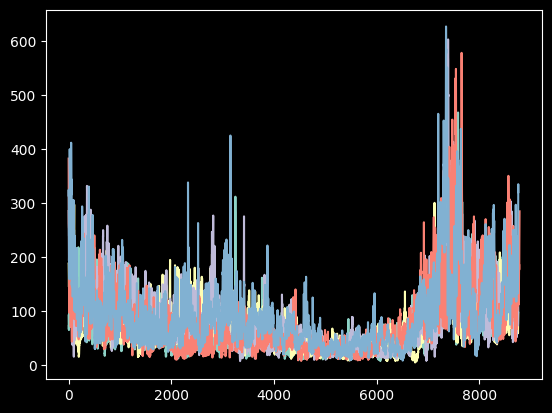

In [13]:
for df in dfs:
    df['PM2.5 (µg/m³)'].plot()

In [51]:
def plot_monthly_average(
    ax: pltaxes.Axes,
    df: pd.DataFrame,
    column_name: str = "PM2.5 (µg/m³)",
    xlabel: str = "Month",
    ylabel: str = "PM2.5",
    title: str = "Month VS PM2.5",
    grid: bool = False,
):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df["Month"] = df["Timestamp"].dt.strftime("%B")
    monthly_averages = df.groupby("Month")[column_name].mean()
    monthly_averages = monthly_averages.reindex(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )

    ax.plot(monthly_averages.index, monthly_averages.values)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.tick_params(axis="x", rotation=45)
    if grid:
        ax.grid()

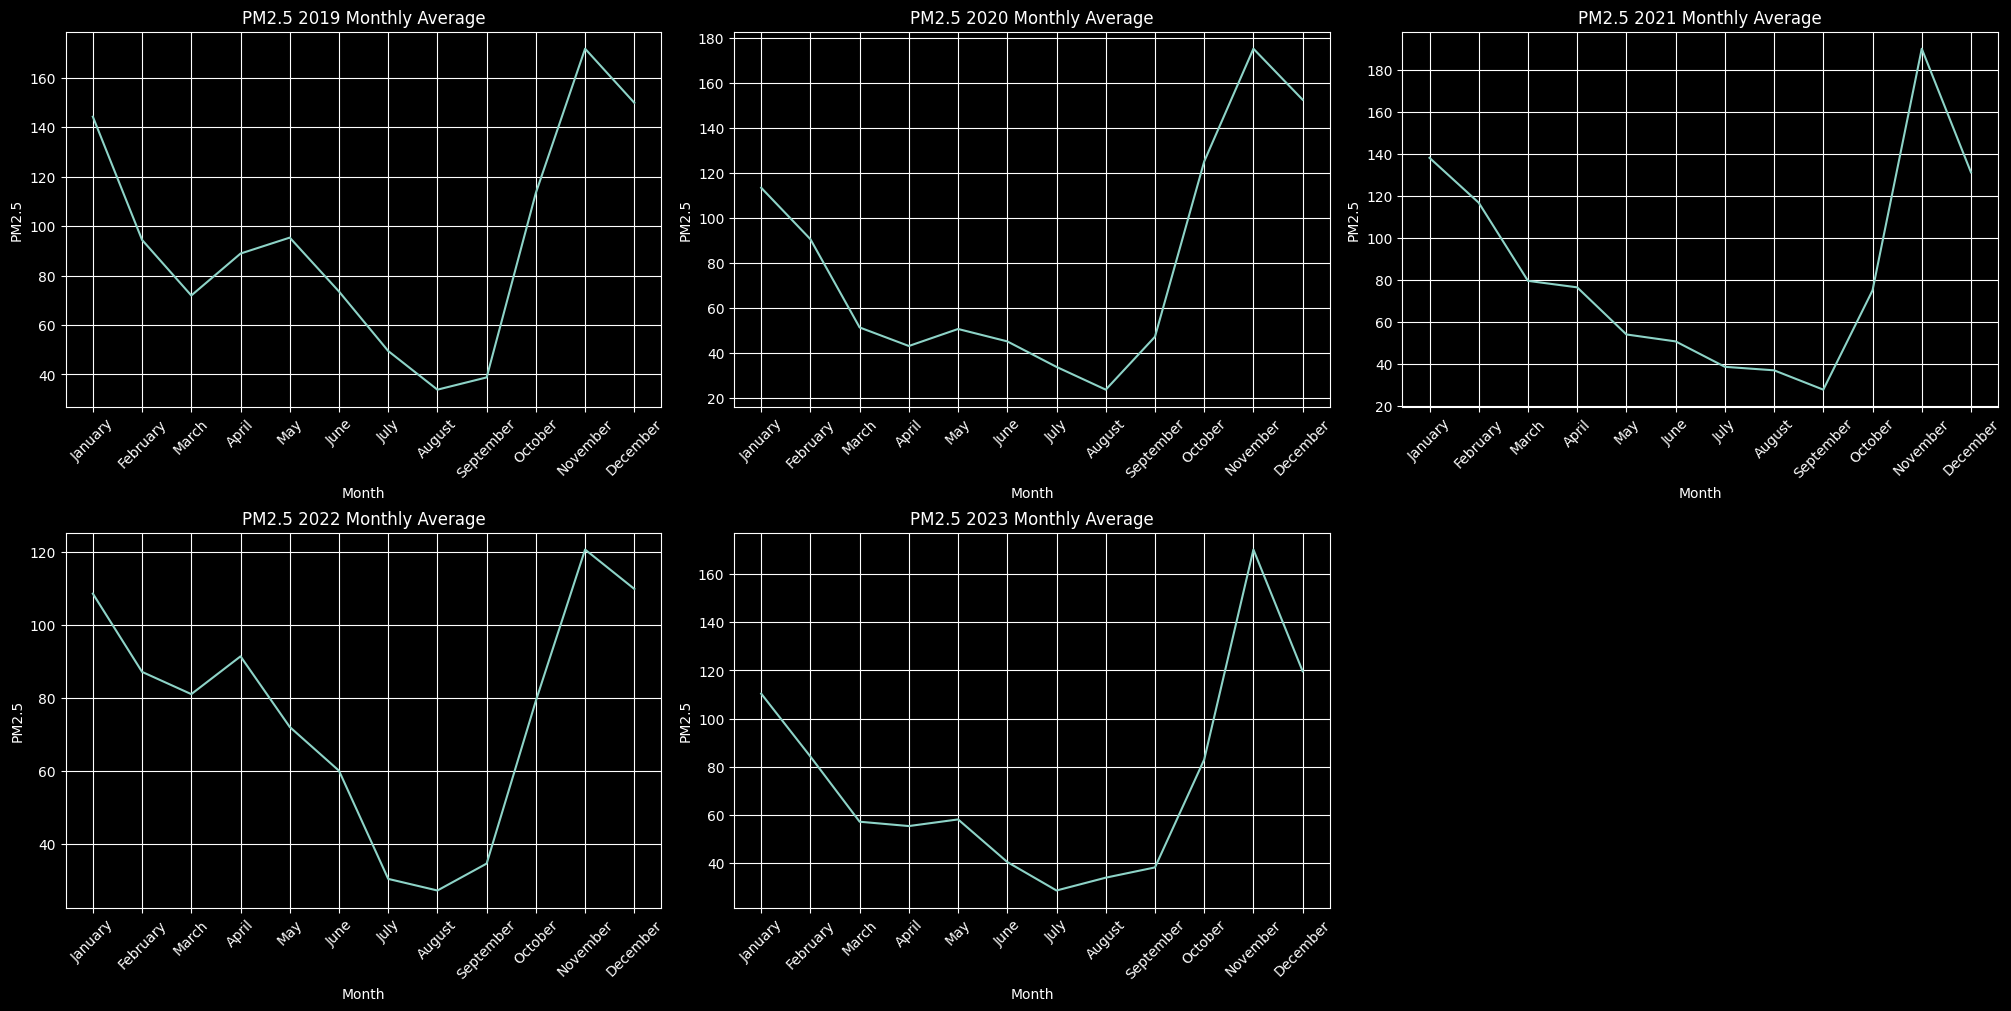

In [ ]:
# create subplots
years = sorted(dfs.keys())
num_years = len(years)
cols = 3
rows = (num_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), constrained_layout=True)

axes = axes.flatten()

# Plot for each year
for i, year in enumerate(years):
    plot_monthly_average(
        axes[i],
        dfs[year],
        column_name="PM2.5 (µg/m³)",
        xlabel="Month",
        ylabel="PM2.5",
        title=f"PM2.5 {year} Monthly Average",
        grid=True,
    )

# Hide unused plots
for i in range(num_years, len(axes)):
    axes[i].axis("off")

plt.show()

In [65]:
series = dfs["2019"]["PM2.5 (µg/m³)"]

<Axes: >

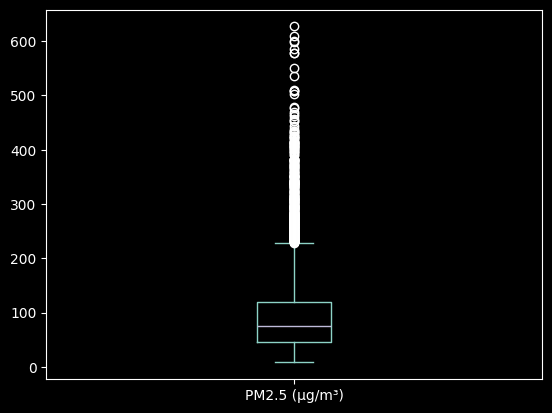

In [66]:
series.plot(kind='box')

<Axes: >

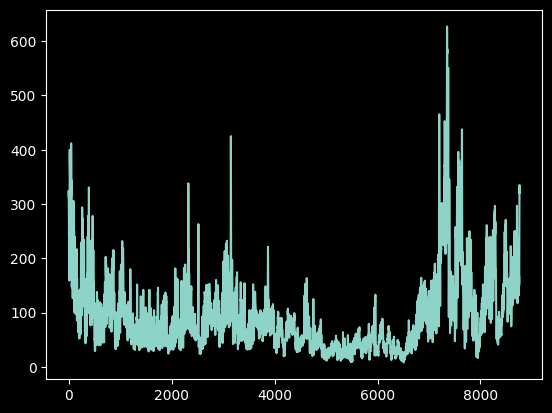

In [67]:
series.plot(kind='line')

<Axes: >

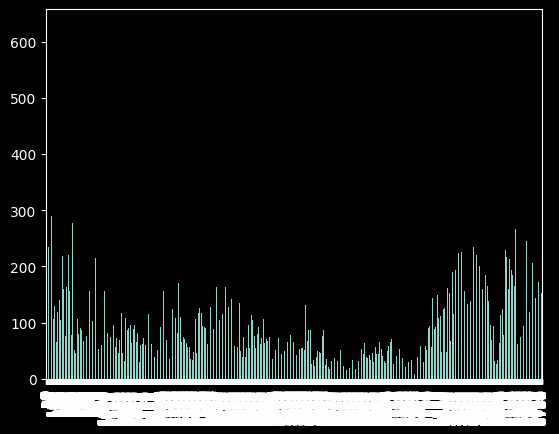

In [68]:
series.plot(kind='bar')

<Axes: ylabel='Frequency'>

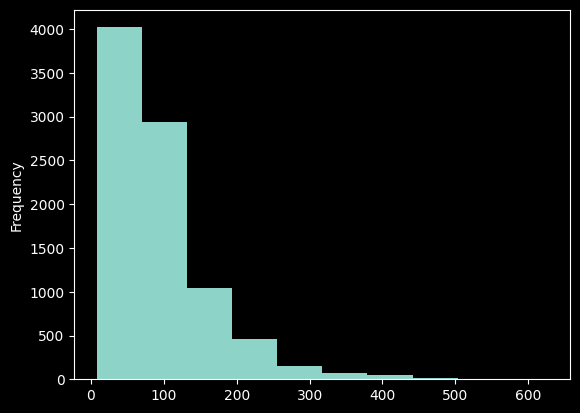

In [69]:
series.plot(kind='hist')

<Axes: >

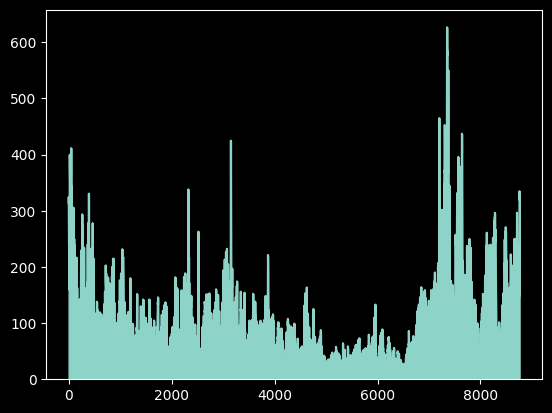

In [70]:
series.plot(kind='area')

<Axes: xlabel='Month', ylabel='PM2.5 (µg/m³)'>

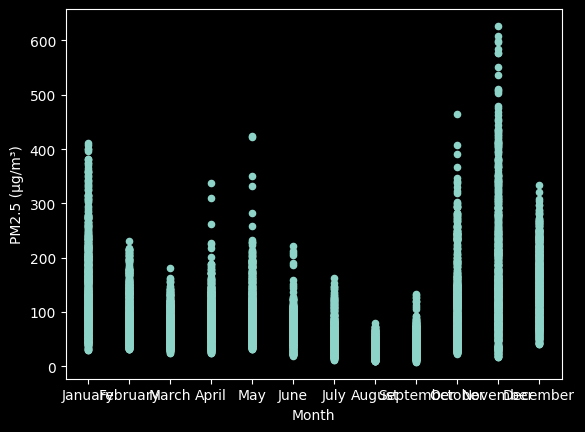

In [73]:
dfs["2019"].plot(kind="scatter", x="Month", y="PM2.5 (µg/m³)")

<Axes: ylabel='PM2.5 (µg/m³)'>

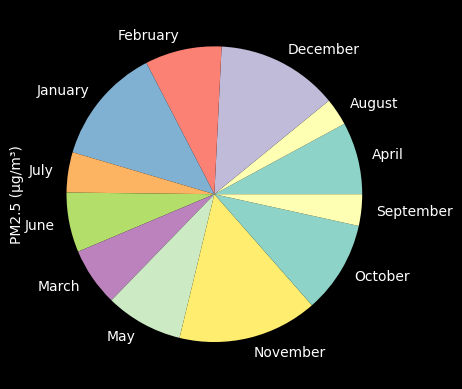

In [74]:
dfs["2019"].groupby("Month")["PM2.5 (µg/m³)"].mean().plot(kind="pie")